<a href="https://colab.research.google.com/github/Franruaben11/HeartDisease/blob/main/heartdiseasep1(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Enfermedades Cardíacas

En este proyecto, trabajaremos con un conjunto de datos sobre enfermedades cardíacas para predecir la probabilidad de tener una enfermedad cardíaca.

Este conjunto de datos contiene información sobre diferentes factores de riesgo y condiciones de salud recopiladas de una muestra de individuos. Utilizaremos estas características para predecir si un individuo tiene una enfermedad cardíaca.

El conjunto de datos incluye detalles demográficos, evaluaciones de salud, historial médico y hábitos de vida de los individuos. Usaremos estas características para entrenar un modelo de machine learning que pueda predecir la probabilidad de que un individuo tenga una enfermedad cardíaca.

El objetivo final es desarrollar un modelo que pueda ayudar a identificar a las personas con mayor riesgo de enfermedades cardíacas, lo que permitiría intervenciones preventivas y estrategias de salud personalizadas.


# Importe de librerias

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
from google.colab import drive
import os

In [2]:
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/DataScience2/ProyectoHeart")

Mounted at /content/gdrive
/content


In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 39.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=ea6746bfdfd99ae9b923a528ef65de6d19d282fd778b924708834c59155902f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ahjjfyxw/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=0cc65196cef3ea943fccd1e640de3639fb354cf5f1ea5030d5633b431bd02a92
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [4]:
import pandas_profiling

<ipython-input-4-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling



# Carga del dataset

In [5]:
df = pd.read_csv("heart_2022_with_nans.csv")

# Informacion del dataset

In [6]:
df.columns.values

array(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'], dtype=object)

**State**: El estado de residencia del individuo.

**Sex**: El sexo del individuo (por ejemplo, 'Male' o 'Female').

**GeneralHealth**: Una evaluación general de la salud del individuo (por ejemplo, 'Excellent', 'Very good', 'Good', 'Fair', 'Poor').

**PhysicalHealthDays**: Número de días en el último mes que el individuo reportó tener mala salud física.

**MentalHealthDays**: Número de días en el último mes que el individuo reportó tener mala salud mental.

**LastCheckupTime**: Tiempo desde la última vez que el individuo tuvo un chequeo médico (por ejemplo, 'Within the past year', '1-2 years ago', etc.).

**PhysicalActivities**: Si el individuo realiza actividades físicas (por ejemplo, 'Yes' o 'No').

**SleepHours**: Número promedio de horas de sueño por noche.
RemovedTeeth: Número de dientes removidos.

**HadHeartAttack**: Si el individuo ha tenido un ataque cardíaco (por ejemplo, 'Yes' o 'No').

**HadAngina**: Si el individuo ha tenido angina (por ejemplo, 'Yes' o 'No').

**HadStroke**: Si el individuo ha tenido un derrame cerebral (por ejemplo, 'Yes' o 'No').

**HadAsthma**: Si el individuo tiene asma (por ejemplo, 'Yes' o 'No').

**HadSkinCancer**: Si el individuo ha tenido cáncer de piel (por ejemplo, 'Yes' o 'No').

**HadCOPD**: Si el individuo tiene Enfermedad Pulmonar Obstructiva Crónica (COPD, por sus siglas en inglés) (por ejemplo, 'Yes' o 'No').

**HadDepressiveDisorder**: Si el individuo tiene un trastorno depresivo (por ejemplo, 'Yes' o 'No').

**HadKidneyDisease**: Si el individuo tiene enfermedad renal (por ejemplo, 'Yes' o 'No').

**HadArthritis**: Si el individuo tiene artritis (por ejemplo, 'Yes' o 'No').

**HadDiabetes**: Si el individuo tiene diabetes (por ejemplo, 'Yes' o 'No').

**DeafOrHardOfHearing**: Si el individuo es sordo o tiene dificultades auditivas (por ejemplo, 'Yes' o 'No').

**BlindOrVisionDifficulty**: Si el individuo es ciego o tiene dificultades visuales (por ejemplo, 'Yes' o 'No').

**DifficultyConcentrating**: Si el individuo tiene dificultades para concentrarse, recordar o tomar decisiones (por ejemplo, 'Yes' o 'No').

**DifficultyWalking**: Si el individuo tiene dificultades para caminar o subir escaleras (por ejemplo, 'Yes' o 'No').

**DifficultyDressingBathing**: Si el individuo tiene dificultades para vestirse o bañarse (por ejemplo, 'Yes' o 'No').

**DifficultyErrands**: Si el individuo tiene dificultades para hacer mandados solo (por ejemplo, 'Yes' o 'No').

**SmokerStatus**: Estado de fumador del individuo (por ejemplo, 'Current smoker', 'Former smoker', 'Never smoked').

**ECigaretteUsage**: Si el individuo usa cigarrillos electrónicos (por ejemplo, 'Yes' o 'No').

**ChestScan**: Si el individuo ha tenido un escaneo de tórax (por ejemplo, 'Yes' o 'No').

**RaceEthnicityCategory**: Categoría de raza/etnia del individuo (por ejemplo, 'White', 'Black', 'Asian', etc.).

**AgeCategory**: Categoría de edad del individuo (por ejemplo, '18-24', '25-34', '35-44', etc.).

**HeightInMeters**: Altura del individuo en metros.

**WeightInKilograms**: Peso del individuo en kilogramos.

**BMI**: Índice de Masa Corporal del individuo.

**AlcoholDrinkers**: Si el individuo consume alcohol (por ejemplo, 'Yes' o 'No').

**HIVTesting**: Si el individuo ha sido sometido a una prueba de VIH (por ejemplo, 'Yes' o 'No').

**FluVaxLast12**: Si el individuo ha recibido una vacuna contra la gripe en los últimos 12 meses (por ejemplo, 'Yes' o 'No').

**PneumoVaxEver**: Si el individuo ha recibido una vacuna contra el neumococo alguna vez (por ejemplo, 'Yes' o 'No').

**TetanusLast10Tdap**: Si el individuo ha recibido una vacuna contra el tétanos en los últimos 10 años (Tdap) (por ejemplo, 'Yes' o 'No').

**HighRiskLastYear**: Si el individuo ha sido identificado como de alto riesgo en el último año (por ejemplo, 'Yes' o 'No').

**CovidPos**: Si el individuo ha dado positivo en una prueba de
COVID-19 (por ejemplo, 'Yes' o 'No').

In [7]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             No  ...            NaN   
1         6.0          NaN             No  ...           1.60   
2         5.0          NaN             No  ...           1.57   
3         7.0          NaN             No  ...           1.65   
4         9.0          NaN             No  ...           1.57   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0               NaN    NaN              No         No          Yes   
1             68.04  26.57              No         No           No   
2             63.50  25.61              No         No           No   
3             63.50  23.30              No         No          Yes   
4             53.98  21.77             Yes         No           No   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0            No  Yes, received tetanus shot but not sure what type   
1            No  No, did not receive any tetanus shot in the pa...   
2            No                                                NaN   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No       No  
4               No       No  

[5 rows x 40 columns]


Podemos ver las 5 primeras filas del dataset








In [8]:
df.shape

(445132, 40)

El dataset antes de ser limpiado tiene 445132 filas y 40 columnas

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

**Podemos resaltar los siguiente.**

1.   Tenemos muchos datos de tipo "object"
2.   Tenemos nulls en todas las columnas exceptuando "Sex" y "State"



# Estadistica de datos

Prefiero hacer enfasis en estos datos y no en algunas otras columnas que las voy a pasar a tipo numeric

In [10]:
#Descripcion total del dataframe transpuesto
df.describe().T

count       mean        std    min    25%    50%  \
PhysicalHealthDays  434205.0   4.347919   8.688912   0.00   0.00   0.00   
MentalHealthDays    436065.0   4.382649   8.387475   0.00   0.00   0.00   
SleepHours          439679.0   7.022983   1.502425   1.00   6.00   7.00   
HeightInMeters      416480.0   1.702691   0.107177   0.91   1.63   1.70   
WeightInKilograms   403054.0  83.074470  21.448173  22.68  68.04  80.74   
BMI                 396326.0  28.529842   6.554889  12.02  24.13  27.44   

                      75%     max  
PhysicalHealthDays   3.00   30.00  
MentalHealthDays     5.00   30.00  
SleepHours           8.00   24.00  
HeightInMeters       1.78    2.41  
WeightInKilograms   95.25  292.57  
BMI                 31.75   99.64



1.   ***SleepHours***: Revisar posibles outliers, ¿24 y 0 horas de sueño son posibles?. Sus datos no varian eso quiere decir que la mayoria duermen 7 horas
2.   ***PhysicalHealtDays y MentalHealthDays***: La mediana es menor que la media, esto puede decirnos que **estan sesgadas hacia los derecha**. Ademas **vemos cierta similitud entre ambas**. Tienen aproximadamnte un std = 8.5 eso quiere decir que **tiene una variacion alta**
3.   ***WeightInKilograms***: Muy alta variabilidad en el peso de las personas

# Funciones

Funcion para pasar valores categoricos que solo contienen "YES" y "TRUE" a 1 y 0

In [11]:
#Pasamos los valores yes a True y no a False
def yes_no_to_bool(x):
  if x == "Yes":
    return 1
  elif x == "No":
    return 0
  else:
    return x


In [12]:
#Completar bmi, weight, height con regla de 3
def complete_BMI_height_weight(dataframe):
  for index, row in dataframe.iterrows():
    if (pd.isna(row["BMI"])):
      dataframe.at[index,"BMI"] = row["WeightInKilograms"] / (row["HeightInMeters"] ** 2)
    elif (pd.isna(row["HeightInMeters"])):
      dataframe.at[index,"HeightInMeters"] = np.sqrt(row['WeightInKilograms'] / row['BMI'])
    else:
      dataframe.at[index,'WeightInKilograms'] = row['BMI'] * (row['HeightInMeters'] ** 2)

In [56]:
#Obtener porcentaje de nulos de una columna
def get_null_percentage(column):
  return (column.isna().sum() / len(column)) * 100

# Entender variable objetivo

In [13]:
df["HadHeartAttack"].value_counts()

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64

Podemos ver como hay un desbalance. Tenemos muchos mas datos de un tipo que de otro

# Organizo dataframe

Reemplazo valores Hombrey Mujer a binario

In [14]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

Reemplazo "Yes" y "No" a True y False solo las columnas que tienen esos dos valores

In [15]:
for col in df.columns:
    # chequea que solo tenga los valores 'Yes' y 'No'
    unique_values = df[col].dropna().unique()
    if set(unique_values).issubset({'Yes', 'No'}):
        # aplico la funcion yes_no_to_bool
        df[col] = df[col].apply(yes_no_to_bool)

podemos rescatar **2238** filas con regla de 3

In [16]:
mascara = df[["BMI", "HeightInMeters", "WeightInKilograms"]].isna().sum(axis=1) == 1
df_1_null = df[mascara]
df_1_null.shape[0]

2238

Ejecuto la funcion para completar los valores NULL de "BMI","Height" y "Weight" con regla de 3

In [17]:
complete_BMI_height_weight(df_1_null)

Actualizo df con los valores de df_1_null en las filas y columnas coincidentes

In [18]:
df.update(df_1_null, overwrite=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  int64  
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  float64
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  float64
 10  HadAngina                  440727 non-null  float64
 11  HadStroke                  443575 non-null  float64
 12  HadAsthma                  443359 non-null  float64
 13  HadSkinCancer              44

# Visualizacion de datos

In [19]:
df.head()

State  Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama    0     Very good                 0.0               0.0   
1  Alabama    0     Excellent                 0.0               0.0   
2  Alabama    0     Very good                 2.0               3.0   
3  Alabama    0     Excellent                 0.0               0.0   
4  Alabama    0          Fair                 2.0               0.0   

                                     LastCheckupTime  PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 0.0   
1                                                NaN                 0.0   
2  Within past year (anytime less than 12 months ...                 1.0   
3  Within past year (anytime less than 12 months ...                 1.0   
4  Within past year (anytime less than 12 months ...                 1.0   

   SleepHours RemovedTeeth  HadHeartAttack  ...  HeightInMeters  \
0         8.0          NaN             0.0  ...             NaN   
1         6.0          NaN             0.0  ...            1.60   
2         5.0          NaN             0.0  ...            1.57   
3         7.0          NaN             0.0  ...            1.65   
4         9.0          NaN             0.0  ...            1.57   

   WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  FluVaxLast12  \
0                NaN    NaN              0.0         0.0           1.0   
1              68.04  26.57              0.0         0.0           0.0   
2              63.50  25.61              0.0         0.0           0.0   
3              63.50  23.30              0.0         0.0           1.0   
4              53.98  21.77              1.0         0.0           0.0   

   PneumoVaxEver                                  TetanusLast10Tdap  \
0            0.0  Yes, received tetanus shot but not sure what type   
1            0.0  No, did not receive any tetanus shot in the pa...   
2            0.0                                                NaN   
3            1.0  No, did not receive any tetanus shot in the pa...   
4            1.0  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear  CovidPos  
0              0.0        No  
1              0.0        No  
2              0.0       Yes  
3              0.0        No  
4              0.0        No  

[5 rows x 40 columns]

In [20]:
df.dtypes

State                         object
Sex                            int64
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities           float64
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack               float64
HadAngina                    float64
HadStroke                    float64
HadAsthma                    float64
HadSkinCancer                float64
HadCOPD                      float64
HadDepressiveDisorder        float64
HadKidneyDisease             float64
HadArthritis                 float64
HadDiabetes                   object
DeafOrHardOfHearing          float64
BlindOrVisionDifficulty      float64
DifficultyConcentrating      float64
DifficultyWalking            float64
DifficultyDressingBathing    float64
DifficultyErrands            float64
SmokerStatus                  object
ECigaretteUsage               object
C

In [21]:
#Cantidad de filas repetidas
df.duplicated().sum()

157

tenemos 157 filas repetidas, pero yo considero que pueden haber dos personas con los mismos resultados en el estudio por lo tanto no las elimino

<Axes: >

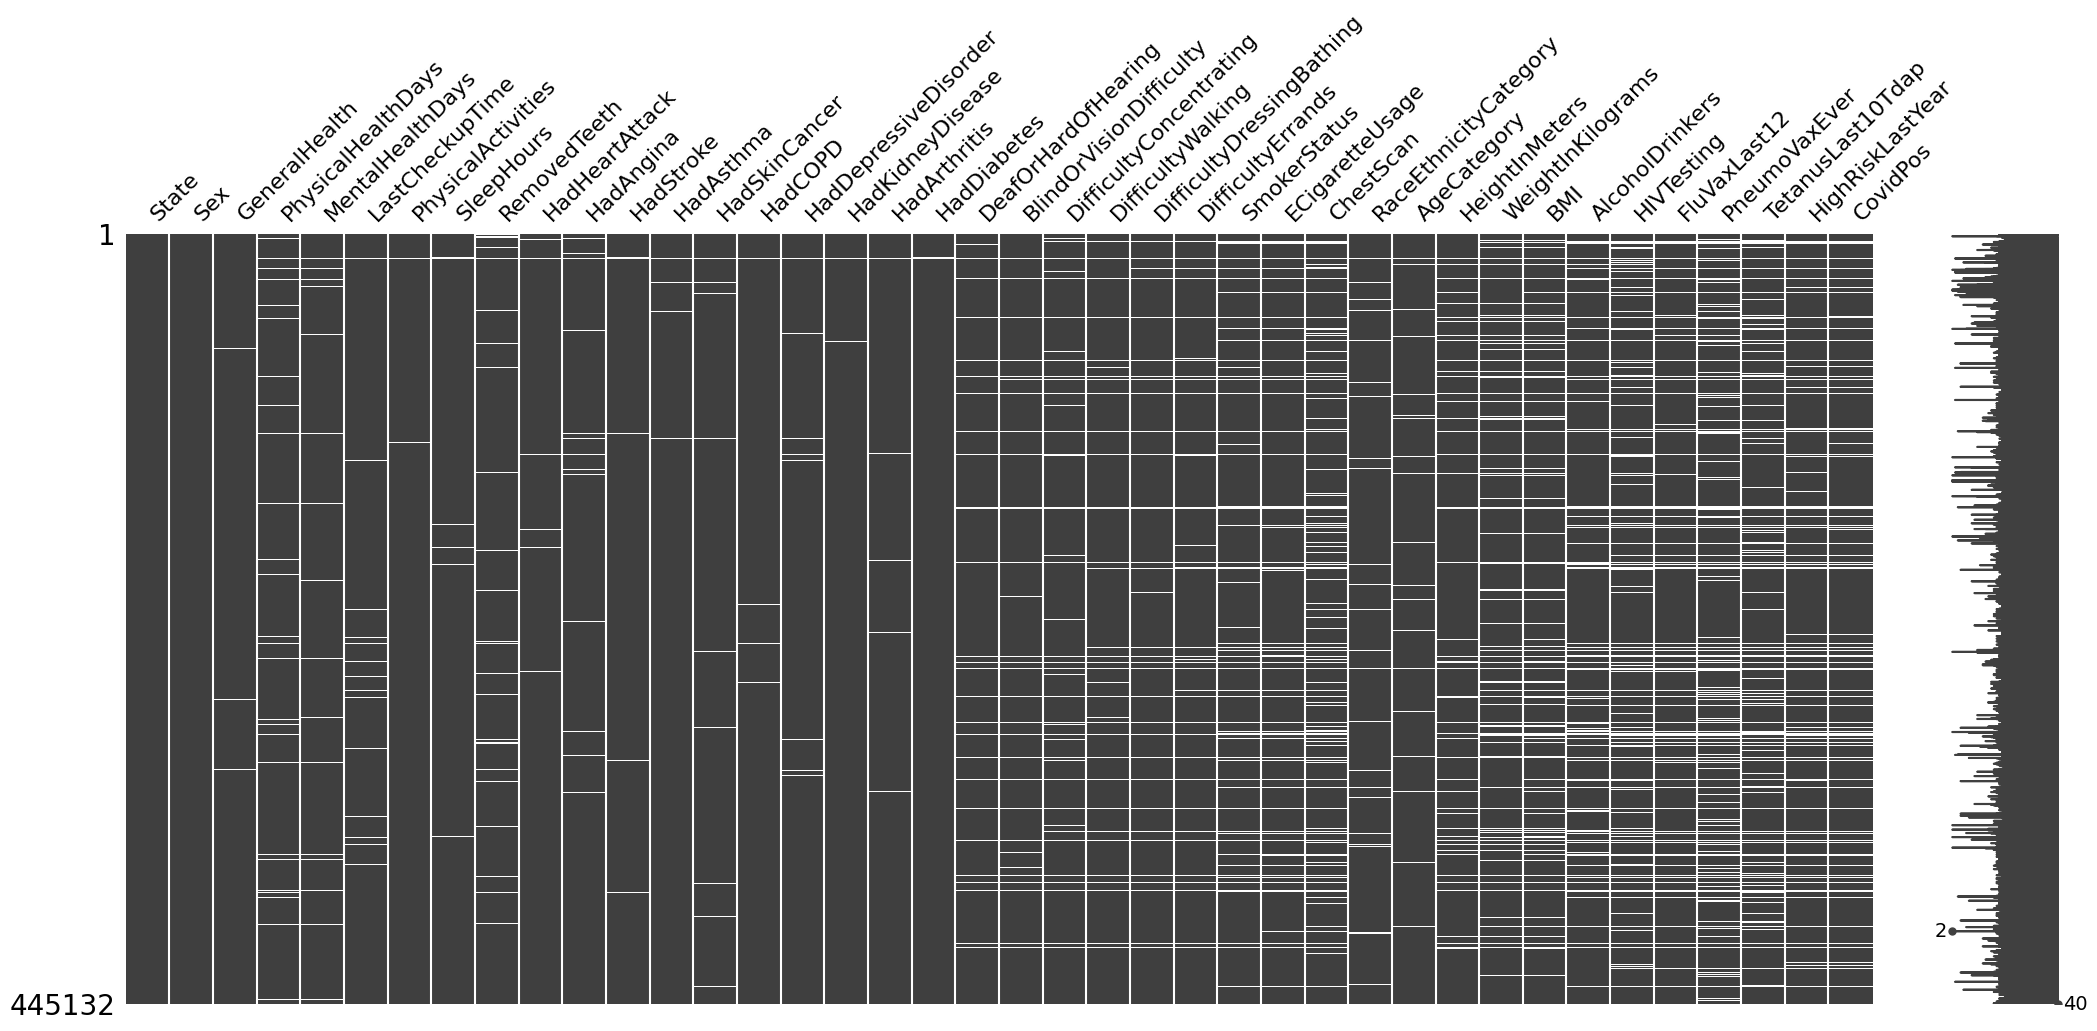

In [22]:
msno.matrix(df)

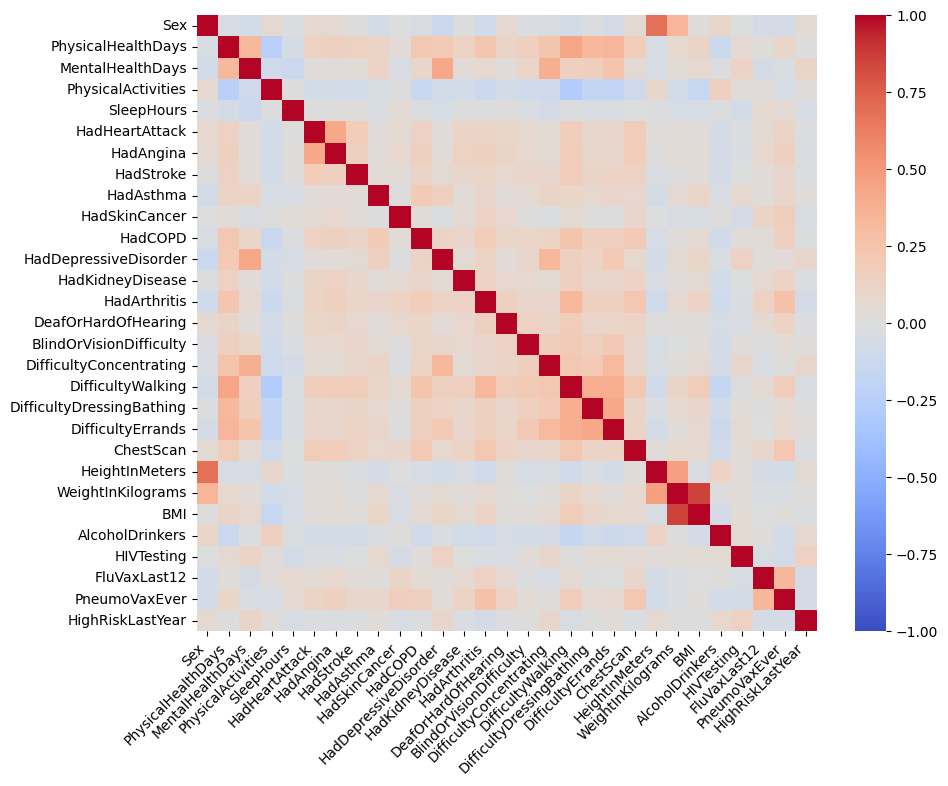

In [74]:
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura para que las etiquetas se vean mejor
sns.heatmap(df_numeric.corr(), cmap='coolwarm', vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor visibilidad
plt.show()

El peso,altura y bmi deberia tener casi que un 100% de correlacion.Por redundancia asumo que puedo eliminar BMI.

Sex tiene alta correlacion con HeightInMeters

<ipython-input-24-dd26025c55df>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f'{x:.1f}%' for x in ax.get_xticks()])


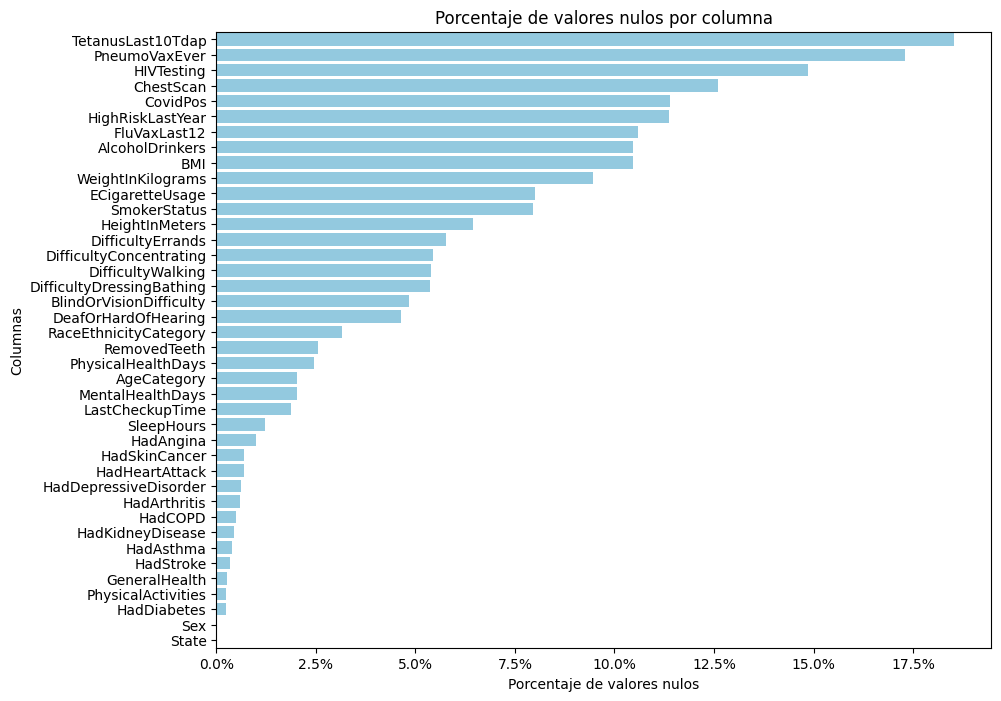

In [24]:
null_percentages = df.isnull().mean() * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Crear un gráfico de barras horizontal para visualizar los porcentajes de valores nulos
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=null_percentages.index, x=null_percentages.values, color='skyblue')

# Agregar etiquetas al gráfico
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Columnas')
ax.set_xticklabels([f'{x:.1f}%' for x in ax.get_xticks()])
plt.show()

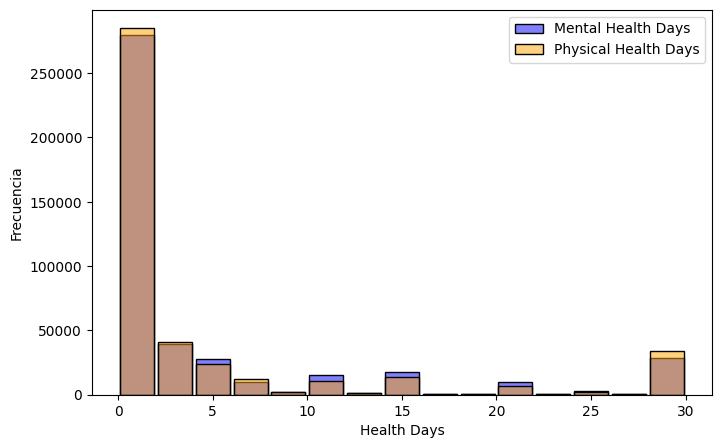

In [25]:
plt.figure(figsize=(8, 5))

sns.histplot(df['MentalHealthDays'], bins=15, shrink=0.9, color='blue', alpha=0.5, label='Mental Health Days')

sns.histplot(df['PhysicalHealthDays'], bins=15, shrink=0.9, color='orange', alpha=0.5, label='Physical Health Days')

plt.ylabel("Frecuencia")
plt.xlabel("Health Days")
plt.legend()

plt.show()

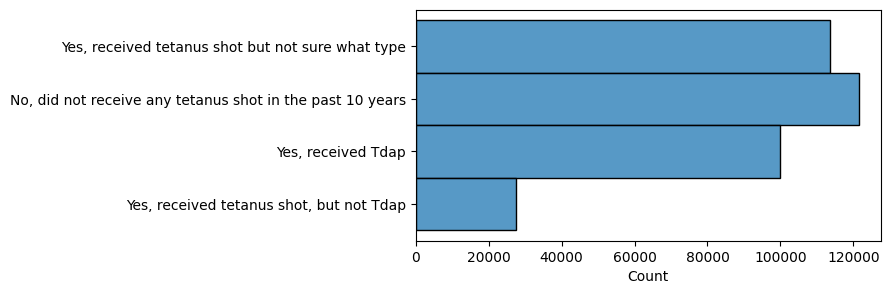

In [49]:
plt.figure(figsize=(6, 3))
sns.histplot(y=df["TetanusLast10Tdap"])
plt.ylabel("")
plt.show()

In [27]:
#df['TetanusLast10Tdap'].fillna('Unknown', inplace=True) CONSIDERO ESTA OPCION PORQUE LOS DATOS ESTAN DISTRIBUIDOS DE UNA MANERA BASTANTE EQUILIBRADA Y PODRIA GENERAR MALA INFORMACION

<Axes: xlabel='AgeCategory'>

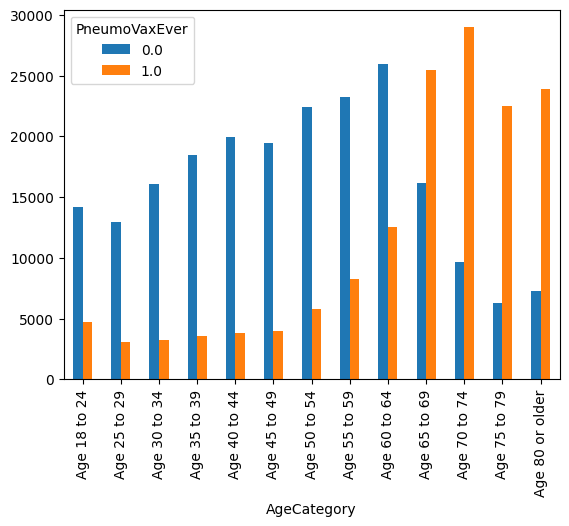

In [29]:
df.groupby(['AgeCategory', 'PneumoVaxEver']).size().unstack().plot(kind="bar")

Podemos ver como cuanto mas adulta es la gente mas es la probabilidad que tenga la vacuna "PneumoVaxEver"

In [28]:
#CHEQUEAR
# Imputa los valores faltantes basados en la mediana de la categoría de edad correspondiente
#df['PneumoVaxEver'] = df.apply(lambda x: median_values[x['AgeCategory']] if pd.isnull(x['PneumoVaxEver']) else x['PneumoVaxEver'], axis=1)


In [36]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [45]:
df.describe().T

count       mean        std        min    25%  \
Sex                        445132.0   0.470061   0.499103   0.000000   0.00   
PhysicalHealthDays         434205.0   4.347919   8.688912   0.000000   0.00   
MentalHealthDays           436065.0   4.382649   8.387475   0.000000   0.00   
PhysicalActivities         444039.0   0.760201   0.426961   0.000000   1.00   
SleepHours                 445132.0   7.022701   1.493196   1.000000   6.00   
HadHeartAttack             442067.0   0.056797   0.231454   0.000000   0.00   
HadAngina                  440727.0   0.060244   0.237938   0.000000   0.00   
HadStroke                  443575.0   0.043373   0.203695   0.000000   0.00   
HadAsthma                  443359.0   0.150429   0.357492   0.000000   0.00   
HadSkinCancer              441989.0   0.080285   0.271734   0.000000   0.00   
HadCOPD                    442913.0   0.080503   0.272071   0.000000   0.00   
HadDepressiveDisorder      442320.0   0.206660   0.404910   0.000000   0.00   
HadKidneyDisease           443206.0   0.045836   0.209131   0.000000   0.00   
HadArthritis               442499.0   0.341578   0.474239   0.000000   0.00   
DeafOrHardOfHearing        424485.0   0.091749   0.288671   0.000000   0.00   
BlindOrVisionDifficulty    423568.0   0.055854   0.229640   0.000000   0.00   
DifficultyConcentrating    420892.0   0.119033   0.323828   0.000000   0.00   
DifficultyWalking          421120.0   0.161667   0.368145   0.000000   0.00   
DifficultyDressingBathing  421217.0   0.039915   0.195760   0.000000   0.00   
DifficultyErrands          419476.0   0.077351   0.267148   0.000000   0.00   
ChestScan                  389086.0   0.426294   0.494538   0.000000   0.00   
HeightInMeters             416480.0   1.702691   0.107177   0.910000   1.63   
WeightInKilograms          403054.0  83.074470  21.448173  22.680000  68.04   
BMI                        398564.0  28.532839   6.609664   6.768013  24.13   
AlcoholDrinkers            398558.0   0.529135   0.499151   0.000000   0.00   
HIVTesting                 379005.0   0.340592   0.473909   0.000000   0.00   
FluVaxLast12               398011.0   0.525754   0.499337   0.000000   0.00   
PneumoVaxEver              368092.0   0.414266   0.492596   0.000000   0.00   
HighRiskLastYear           394509.0   0.043560   0.204115   0.000000   0.00   

                             50%    75%        max  
Sex                         0.00   1.00    1.00000  
PhysicalHealthDays          0.00   3.00   30.00000  
MentalHealthDays            0.00   5.00   30.00000  
PhysicalActivities          1.00   1.00    1.00000  
SleepHours                  7.00   8.00   24.00000  
HadHeartAttack              0.00   0.00    1.00000  
HadAngina                   0.00   0.00    1.00000  
HadStroke                   0.00   0.00    1.00000  
HadAsthma                   0.00   0.00    1.00000  
HadSkinCancer               0.00   0.00    1.00000  
HadCOPD                     0.00   0.00    1.00000  
HadDepressiveDisorder       0.00   0.00    1.00000  
HadKidneyDisease            0.00   0.00    1.00000  
HadArthritis                0.00   1.00    1.00000  
DeafOrHardOfHearing         0.00   0.00    1.00000  
BlindOrVisionDifficulty     0.00   0.00    1.00000  
DifficultyConcentrating     0.00   0.00    1.00000  
DifficultyWalking           0.00   0.00    1.00000  
DifficultyDressingBathing   0.00   0.00    1.00000  
DifficultyErrands           0.00   0.00    1.00000  
ChestScan                   0.00   1.00    1.00000  
HeightInMeters              1.70   1.78    2.41000  
WeightInKilograms          80.74  95.25  292.57000  
BMI                        27.44  31.75  235.52711  
AlcoholDrinkers             1.00   1.00    1.00000  
HIVTesting                  0.00   1.00    1.00000  
FluVaxLast12                1.00   1.00    1.00000  
PneumoVaxEver               0.00   1.00    1.00000  
HighRiskLastYear            0.00   0.00    1.00000

In [47]:
df["HadHeartAttack"].isna().sum()

3065

In [ ]:
profile = pandas_profiling.ProfileReport(df)
profile

# Imputacion datos faltantes

Como vimos antes "SleepHours" tenia la media muy cerca de la mediana

In [41]:
df["SleepHours"].fillna(df["SleepHours"].median(), inplace=True)

Considero una buena opcion eliminar los valores, ya que es la columna que quiero predecir y solo tenia 0.7% de valores nulos

In [48]:
df["HadHeartAttack"].dropna(inplace=True)

Tomo la decision de crear un nuevo valor "Unknown" debido a que tiene 4 valores y su distribucion es equilibrada y esta columna tenia 18% y me iba a generar un desequilibro en un valor

In [50]:
df['TetanusLast10Tdap'].fillna('Unknown', inplace=True)

Potenciales a completar con la mediana porque tienen un gran sesgo y no tienen ninguna relacion

In [52]:
columnas_sesgadas_sin_relacion = ['DeafOrHardOfHearing', 'BlindOrVisionDifficulty']

columna object con pocos nulos, inserto por la MODA

In [63]:
df["RemovedTeeth"].fillna(df["RemovedTeeth"].mode()[0], inplace=True)

1% es un porcentaje bajo y manejable. Decido utilizar una tecnica simple de imputacion (MODA)

In [66]:
for col in df.columns:
  if (get_null_percentage(df[col]) < 1):
    df[col].fillna(df[col].mode()[0], inplace=True)


<Axes: >

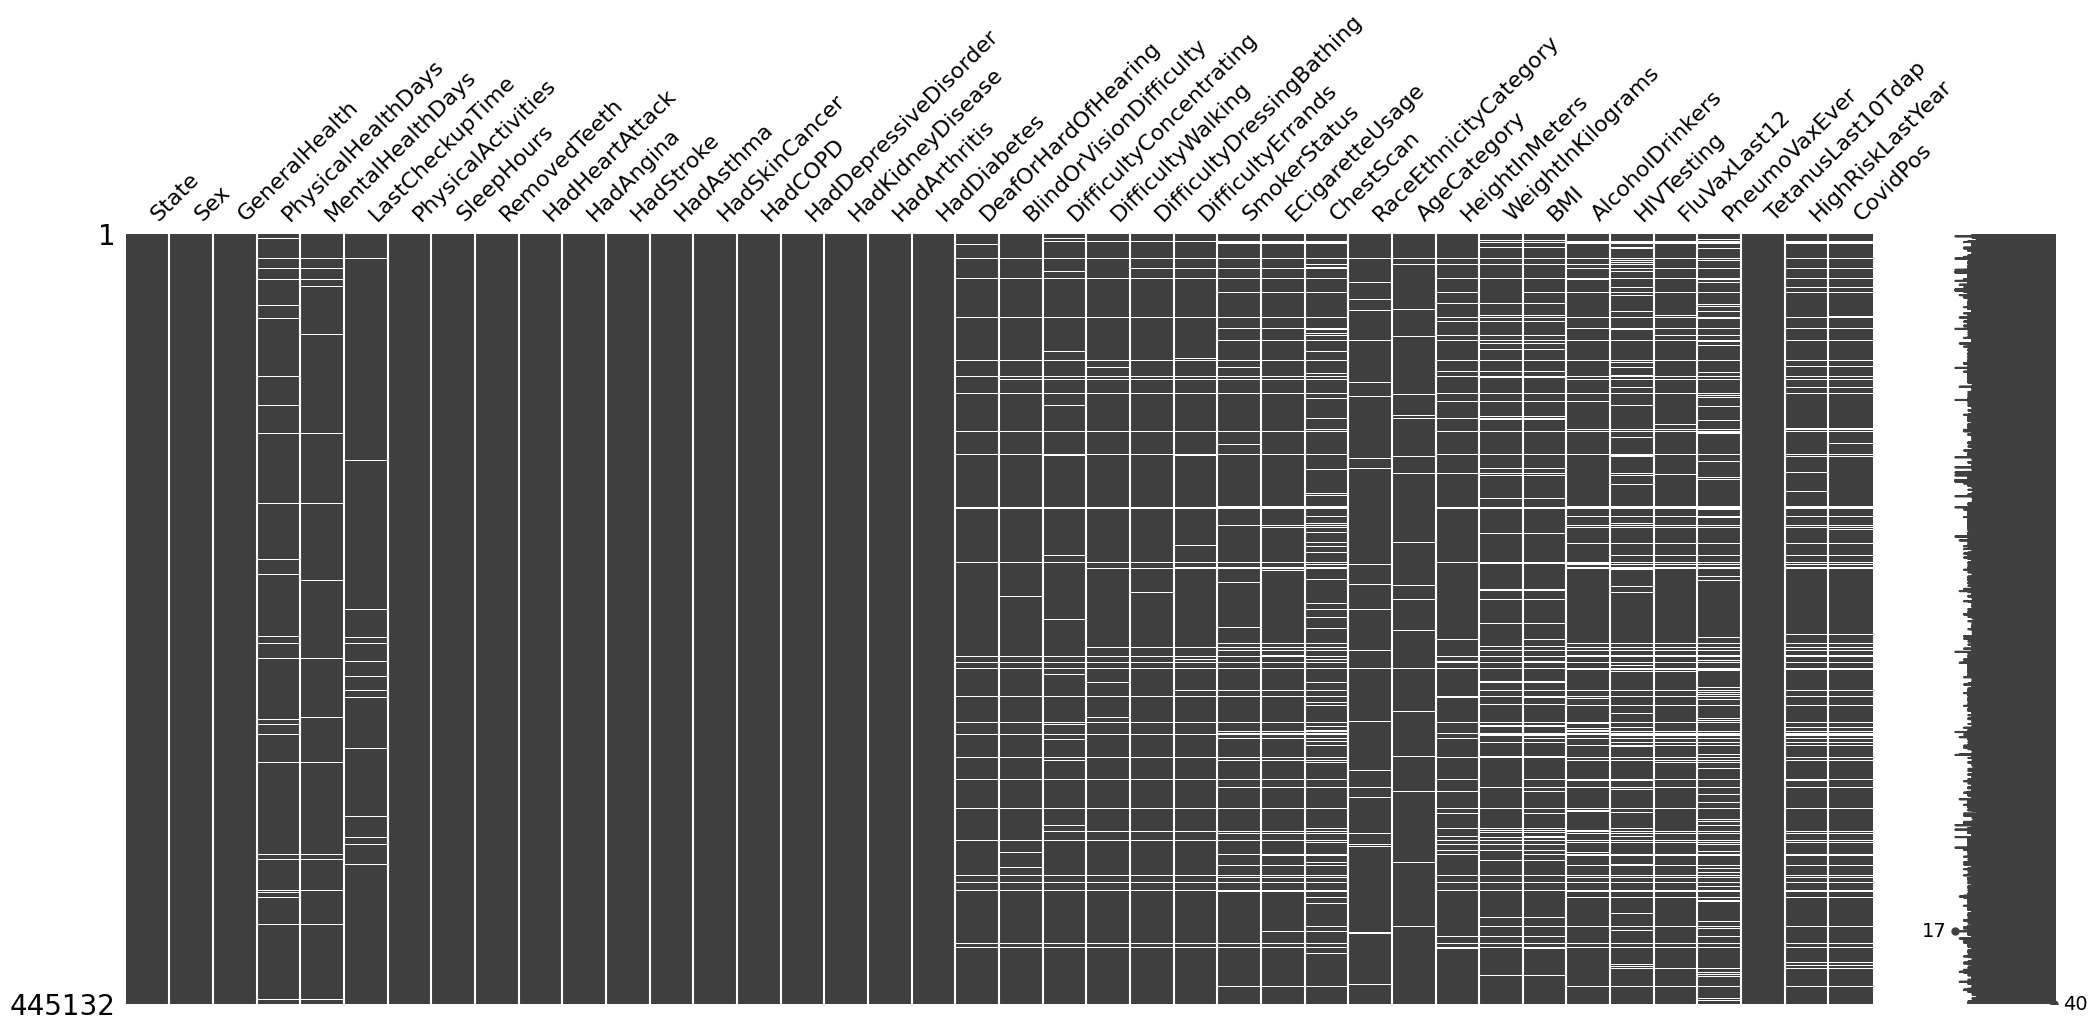

In [67]:
msno.matrix(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
Varias modificaciones, pase los yes/not a numeric. falta hacer getdummies y revisar lo que hay abajo de los espacion que deje vacios

SyntaxError: invalid syntax (<ipython-input-32-db472ec2f5b3>, line 1)

In [ ]:
# Convertir valores infinitos en NaN, Yes en 1 y No en 0
#df_with_nan.replace([np.inf, -np.inf], np.nan)

In [ ]:
"""
serieNull = df_with_nan.isna().sum()
# Ordenar la serie en orden descendente
serieNull = serieNull.sort_values(ascending=False)

# Crear un gráfico de barras para visualizar los valores NaN por columna, ordenados
plt.figure(figsize=(10, 10))
sns.barplot(y=serieNull.index, x=serieNull.values, color='SkyBlue')
plt.title('Cantidad de valores NaN por columna (ordenado)')
plt.xlabel('Cantidad de NaNs')
plt.show()
"""

In [ ]:
null_percentages = df_with_nan.isnull().mean() * 100
null_percentages = null_percentages.sort_values(ascending=False)

# Crear un gráfico de barras horizontal para visualizar los porcentajes de valores nulos
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=null_percentages.index, x=null_percentages.values, color='skyblue')

# Agregar etiquetas al gráfico
plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos')
plt.ylabel('Columnas')
ax.set_xticklabels([f'{x:.1f}%' for x in ax.get_xticks()])
plt.show()


In [ ]:
"""
HAY CATEGORICAS
correlation_matrix = df_with_nan.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Agregar título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()
"""

BMI, la altura y el peso: si 2 NO son null, puedo hallar el tercer

In [ ]:
df_filtred = df_with_nan[["BMI","WeightInKilograms","HeightInMeters"]]
non_null_counts = df_filtred.notnull().sum(axis=1)
count = df_filtred[non_null_counts >= 2].shape[0]
print(f"Elementos maximos que podemos tener con valores reales en BMI,WEIGHT,HEIGHT son: {count}")

In [ ]:
#Pero BMI si puede completarse por regla de 3
#df_with_nan[df_with_nan["BMI"].isna() ==  True][["BMI","WeightInKilograms","HeightInMeters"]]

#### HACER CALCULO PARA HALLAR EL BMI

In [ ]:
#NO LO CONSIDERO NECESARIO YA LO VEMOS EN EL GRAFICO DE TODAS LAS COLUMNAS
"""
# Calcular la cantidad de valores nulos y no nulos
valNull = df_with_nan["TetanusLast10Tdap"].isna().sum()
valNoNull = df_with_nan["TetanusLast10Tdap"].notna().sum()

# Calcular los porcentajes
total = valNull + valNoNull
percNull = (valNull / total) * 100
percNoNull = (valNoNull / total) * 100

# Crear un gráfico de pie para visualizar los valores nulos y no nulos
labels = ['Nulos', 'Conocidos']
sizes = [percNull, percNoNull]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" la primera porción

plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Porcentaje de valores desconocidos y conocidos en TetanusLast10Tdap')
plt.show()
"""

Podriamos completar la columna BMI, HeightInMeters, WeightInKilograms,SleepHours, GeneralHealth y PhysicalHealthDays con la mediana o con lo que nos convenga (analizar)

In [ ]:
set(df_with_nan.dtypes.tolist())

In [ ]:
df_nan_float = df_with_nan.select_dtypes("float64")

In [ ]:
df_nan_float.describe()

In [ ]:
fig = px.box(df_with_nan, x="SleepHours", y="Sex", notched=True,
             color="Sex",  # Añadir color por categoría
             title="Distribución de Horas de Sueño por Sexo",
             labels={"SleepHours": "Horas de Sueño", "Sex": "Sexo"})

fig.show()

In [ ]:
#fig = px.histogram(df_with_nan, x="SleepHours", nbins=24)

#fig.show()

In [ ]:
fig = px.histogram(df_nan_float, x="SleepHours", nbins=24, title='Distribución de horas de sueño')

# Personalizar el gráfico
fig.update_layout(
    xaxis_title='Horas de sueño',
    yaxis_title='Cantidad de personas',
    template='plotly_dark',
    bargap=0.05
)

fig.show()

In [ ]:
# Filtrar los casos donde HadHeartAttack es "Yes"
df_heart_attack = df_with_nan[df_with_nan['HadHeartAttack'] == "Yes"]

# Agrupar por 'Sex' y 'State' y contar las ocurrencias de HadHeartAttack
grouped = df_heart_attack.groupby(['Sex', 'State']).size()

print(grouped)

In [ ]:
df_state = pd.DataFrame(df_with_nan.groupby(["Sex","State"]).count())

In [ ]:
df_state

In [ ]:
stateParticipants = df_with_nan["State"].value_counts()
stateHeartAttack = df_with_nan[df_with_nan["HadHeartAttack"] == 1].groupby(['State']).count()["Sex"]
porcHeartAttack = (stateHeartAttack * 100) / stateParticipants
countMale = df_with_nan[df_with_nan["Sex"] == "Male"].groupby(["State"]).count()["Sex"]
countFemale = df_with_nan[df_with_nan["Sex"] == "Female"].groupby(["State"]).count()["Sex"]

df_state = pd.DataFrame(
    index=stateParticipants.index,
    data={
        "CountParticipants": stateParticipants.values,
        "Male":countMale,
        "Female":countFemale,
        "CountHeartAttack": stateHeartAttack.values,
        "PorcHeartAttack": porcHeartAttack
    }
)

### HACER INDICES JERARQUICOS CON SEXO MASCULINO Y FEMENINO

df_state.sort_values(by="PorcHeartAttack",ascending=False, inplace=True)

In [ ]:
fig = px.bar(df_state.sort_values(by="CountParticipants", ascending=False), x=df_state.index, y="CountParticipants",
             title="Estado de las personas que participaron del estudio",
             labels={"count": "Cantidad de Personas"})

fig.update_layout(
    width=800,  # Ancho del gráfico
    height=600,  # Alto del gráfico
)

fig.show()

In [ ]:
"""
df_nan_float.hist(figsize=(16, 14), xlabelsize=8, ylabelsize=8, layout=(2, 3))

# Mostrar el gráfico
plt.show()
"""

In [ ]:
df_type_object = df_with_nan.select_dtypes("object")

In [ ]:
df_type_object.columns

como las paso a numericas?: (RemovedTeeth, LastCheckupTime, RaceEthnicityCategory, AgeCategory, TetanusLast10Tdap, ECigaretteUsage, SmokerStatus, SmokerStatus)

In [ ]:
df_type_object[['RemovedTeeth', 'LastCheckupTime', 'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'ECigaretteUsage', 'SmokerStatus', 'SmokerStatus']].head()

In [ ]:
# Crear el gráfico de barras con Plotly Express
fig = px.bar(df_state,
             x=df_state.index,
             y="PorcHeartAttack",
             title="Porcentaje de ataques al corazón por Estado (con los datos de la encuesta)",
             labels={"x": "Estado", "y": "Porcentaje de ataques al corazón"},
            )

# Ajustar el diseño del gráfico
fig.update_layout(
    width=1200,  # Ancho del gráfico
    height=600,  # Alto del gráfico
)

fig.show()

In [ ]:
#Data Profiling
profile = pandas_profiling.ProfileReport(df_with_nan)
profile